In [12]:
!pip install PySastrawi
from bs4 import BeautifulSoup
import requests
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import tensorflow as tf
import numpy as np
import sklearn
import gensim
from keras_preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 210 kB 5.0 MB/s 


# Scrapping Data

In [ ]:
#scrapping news
import bs4
URL = "https://turnbackhoax.id/category/fitnah-hasut-hoax/page/"
upperframe = []

for page in range(1,421):
  data = []
  req = requests.get(URL + str(page) + "/")
  soup = BeautifulSoup(req.text, "html.parser")

  coverpage_news = soup.find_all("h3", attrs = {"class" : "entry-title mh-loop-title"})
  for j in coverpage_news:
    judul = j.find("a").get_text().strip()
    link = j.find("a")["href"].strip()
    data.append([judul, link])
  upperframe.extend(data)  

In [ ]:
#create dataframe for scrapping news
data = pd.DataFrame(upperframe, columns=["judul","link"])
data.head(10)

## Data Preprocessing

In [ ]:
real_train = pd.read_excel("real_train.xlsx")
real_test = pd.read_excel("real_testing.xlsx")
fake_train = pd.read_excel("fake_train.xlsx")
fake_test = pd.read_excel("fake_testing.xlsx")
test = pd.read_csv("Data_latih.csv")

Data Training

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
real_train["label"] = 0
real_test["label"] = 0
fake_train["label"] = 1
fake_test["label"] = 1

In [ ]:
train = pd.concat([real_train, fake_train], ignore_index=True)
validation = pd.concat([real_test, fake_test], ignore_index=True)

In [ ]:
#Preprocessing data training
#remove punctuation
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
def remove_punctuation(text):
    no_punct = "".join([i for i in text if i not in punc])
    return no_punct

train['judul'] = train['judul'].apply(lambda x: remove_punctuation(x))

#lowering text
train['judul'] = train['judul'].apply(lambda x: x.lower())

#remove number
def remove_number(text):
    no_number = re.sub(r'\d', '', text)
    return no_number

train['judul'] = train['judul'].apply(lambda x: remove_number(x))

#remove emoji
train["judul"] = train["judul"].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

#remove whitespace
# def remove_whitespace(text):
#     if len(text.split()) > 1:
#         result = ' '.join(text.split())
#         return result

# df['judul'] = df['judul'].apply(remove_whitespace)
# df.head(10)

#define stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#define stopwords
stopword = stopwords.words('indonesian')
stopword.extend(["c", "rp", "di", "ok", "tak", "r", "x", "i", "ini", "jadi", "ada", "ke", "dan", "akan", 
"sang", "yang", "ada", "bagi", "untuk", "pada", "dengan", "saat", "tidak", "nak", "tapi", "buat", "semua",
"dari", "ingin", "gara", "saat", "anak", "hey", "bro"])

def clean_text(text, stem=False):
    tokens = []
    for token in text.split():
        if token not in stopword:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return tokens

train['judul_baru'] = train['judul'].apply(lambda x: clean_text(x))
train.head(10)

Data validation

In [ ]:
#remove punctuation
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
def remove_punctuation(text):
    no_punct = "".join([i for i in text if i not in punc])
    return no_punct

validation['judul'] = validation['judul'].apply(lambda x: remove_punctuation(x))

#lowering text
validation['judul'] = validation['judul'].apply(lambda x: x.lower())

#remove number
def remove_number(text):
    no_number = re.sub(r'\d', '', text)
    return no_number

validation['judul'] = validation['judul'].apply(lambda x: remove_number(x))

#remove emoji
validation["judul"] = validation["judul"].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

#define stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#define stopwords
stopword = stopwords.words('indonesian')
stopword.extend(["c", "rp", "di", "ok", "tak", "r", "x", "i", "ini", "jadi", "ada", "ke", "dan", "akan", 
"sang", "yang", "ada", "bagi", "untuk", "pada", "dengan", "saat", "tidak", "nak", "tapi", "buat", "semua",
"dari", "ingin", "gara", "saat", "anak", "hey", "bro"])

def clean_text(text, stem=False):
    tokens = []
    for token in text.split():
        if token not in stopword:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return tokens

validation['judul_baru'] = validation['judul'].apply(lambda x: clean_text(x))

validation.head(10)

In [ ]:
# data testing
#remove punctuation
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
def remove_punctuation(text):
    no_punct = "".join([i for i in text if i not in punc])
    return no_punct

test['judul'] = test['judul'].apply(lambda x: remove_punctuation(x))

#lowering text
test['judul'] = test['judul'].apply(lambda x: x.lower())

#remove number
def remove_number(text):
    no_number = re.sub(r'\d', '', text)
    return no_number

test['judul'] = test['judul'].apply(lambda x: remove_number(x))

#remove emoji
test["judul"] = test["judul"].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

#define stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#define stopwords
stopword = stopwords.words('indonesian')
stopword.extend(["c", "rp", "di", "ok", "tak", "r", "x", "i", "ini", "jadi", "ada", "ke", "dan", "akan", 
"sang", "yang", "ada", "bagi", "untuk", "pada", "dengan", "saat", "tidak", "nak", "tapi", "buat", "semua",
"dari", "ingin", "gara", "saat", "anak", "hey", "bro"])

def clean_text(text, stem=False):
    tokens = []
    for token in text.split():
        if token not in stopword:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return tokens

test['judul_baru'] = test['judul'].apply(lambda x: clean_text(x))

test.head(10)

# Build and Training Model (LSTM)

In [ ]:
len(train)
len(validation)
len(test)

4231

In [ ]:
train_sentences = train["judul_baru"].tolist()
validation_sentences = validation["judul_baru"].tolist()
test_sentences = test["judul_baru"].tolist()

In [7]:
vocab_size = 2000
embedding_dim = 16
max_length = 100
trunc_type = "post"
padding_type = "post"
oov_tok = "<OOV>"

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

NameError: ignored

In [ ]:
from keras_preprocessing.sequence import pad_sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
training_padded = pad_sequences(train_sequences, maxlen = max_length)

In [ ]:
val_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(val_sequences, maxlen = max_length)

In [ ]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(test_sequences, maxlen = max_length)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128)))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 16)           32000     
                                                                 
 dropout_4 (Dropout)         (None, 100, 16)           0         
                                                                 
 bidirectional_10 (Bidirecti  (None, 256)              148480    
 onal)                                                           
                                                                 
 dense_19 (Dense)            (None, 1)                 257       
                                                                 
Total params: 180,737
Trainable params: 180,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [ ]:
history = model.fit(training_padded, train["label"], validation_data=(validation_padded, validation["label"]), epochs=5)

Epoch 1/5
420/420 [==============================] - 11s 19ms/step - loss: 0.4555 - accuracy: 0.7781 - val_loss: 0.4504 - val_accuracy: 0.7749
Epoch 2/5
420/420 [==============================] - 7s 17ms/step - loss: 0.2293 - accuracy: 0.9031 - val_loss: 0.4246 - val_accuracy: 0.8002
Epoch 3/5
420/420 [==============================] - 7s 17ms/step - loss: 0.2178 - accuracy: 0.9092 - val_loss: 0.4550 - val_accuracy: 0.8035
Epoch 4/5
420/420 [==============================] - 7s 16ms/step - loss: 0.2067 - accuracy: 0.9211 - val_loss: 0.4726 - val_accuracy: 0.7964
Epoch 5/5
420/420 [==============================] - 7s 16ms/step - loss: 0.1628 - accuracy: 0.9320 - val_loss: 0.4600 - val_accuracy: 0.8056


In [ ]:
model.save("lstm_model.h5")

In [ ]:
model.save_weights("lstm_weights.h5")

Training history

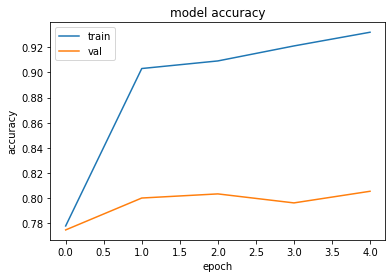

In [ ]:
# History training

import matplotlib.pyplot as plt

#Summary acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



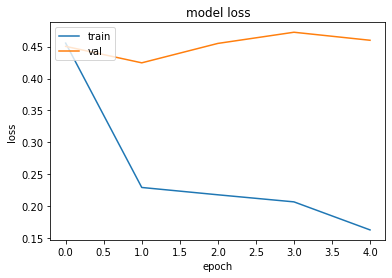

In [ ]:
# summmary loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Model evaluation and prediction

In [ ]:
train_acc = model.evaluate(training_padded, train["label"])
val_acc = model.evaluate(validation_padded, validation["label"])
test_acc = model.evaluate(testing_padded, test["label"])

print("train acc: ", train_acc)
print("val acc: ", val_acc)
print("test acc: ", test_acc)

133/133 [==============================] - 1s 7ms/step - loss: 0.7907 - accuracy: 0.7464
train acc:  [0.13378798961639404, 0.9490388631820679]
val acc:  [0.4599795937538147, 0.8056052327156067]
test acc:  [0.7906951308250427, 0.7463956475257874]


In [5]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
model = keras.models.load_model("lstm_model.h5")
model.load_weights("lstm_weights.h5")

In [14]:
# preprocess
#remove punctuation
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
def remove_punctuation(text):
    no_punct = "".join([i for i in text if i not in punc])
    return no_punct


#remove number
def remove_number(text):
    no_number = re.sub(r'\d', '', text)
    return no_number


#define stemming

factory = StemmerFactory()
stemmer = factory.create_stemmer()

#define stopwords
stopword = stopwords.words('indonesian')
stopword.extend(["c", "rp", "di", "ok", "tak", "r", "x", "i", "ini", "jadi", "ada", "ke", "dan", "akan", 
"sang", "yang", "ada", "bagi", "untuk", "pada", "dengan", "saat", "tidak", "nak", "tapi", "buat", "semua",
"dari", "ingin", "gara", "saat", "anak", "hey", "bro"])

def clean_text(text, stem=False):
    tokens = []
    for token in text.split():
        if token not in stopword:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return tokens

In [19]:

#predict on new text
def new_predict(text, model):
  text = text.lower()
  text = remove_punctuation(text)
  text = remove_number(text)
  text = clean_text(text)
  tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
  tokenizer.fit_on_texts(text)
  pred = tokenizer.texts_to_sequences(text)
  prediction = model.predict(pred)
  avg_pred = prediction.mean()
  if avg_pred > 0.5:
    text_label = 'Hoax'
  else:
    text_label = 'Valid'
  return text_label, avg_pred


In [69]:
# prediction example
import csv
import pandas as pd
fake_test = pd.read_csv("Data_latih.csv")
text = fake_test['judul'][0]
print(text)
text_label, avg_pred = new_predict(text, model)
print()
print('-------Prediction result--------')
print('probability of this news is being fake: ', avg_pred)
print('so this news is',text_label.upper())

Pemakaian Masker Menyebabkan Penyakit Legionnaires

-------Prediction result--------
probability of this news is being fake:  0.8058345
so this news is HOAX
